# <p style="text-align:center; color:orange; font-size:1.8em"> Email Spam Detection </p>

<img src='./spam.png' style='height: 280px; width:900px'>

#### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading Dataset

In [2]:
spam_df = pd.read_csv("spam.csv", encoding='latin1')
spam_df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Drop Unnecessary Columns

In [3]:
spam_df = spam_df.drop(spam_df.columns[[2,3,4]], axis=1) 
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Renaming Features

In [4]:
spam_df.rename(columns={'v1': 'Label', 'v2': 'Mail'}, inplace=True)
spam_df.head()

,Label,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [5]:
spam_df.isnull().sum()

Label    0
Mail     0
dtype: int64

In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Preprocessing

In [7]:
spam_df['Mail'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [8]:
#This data contains huge ammount of space and dot so we use regex for given only words and numbers.
import re
spam_df['Mail'] = spam_df['Mail'].apply(lambda x: ' '.join(re.findall(r'[A-Za-z0-9]+', str(x))))

In [9]:
spam_df['Mail'][0]

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [10]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
spam_df['Label'] = lbl.fit_transform(spam_df['Label'])

spam_df.head()

,Label,Mail
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives arou...


### Model Training

#### Dividing data into training and testing set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(spam_df["Mail"], spam_df["Label"], test_size=0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


#### Create a CountVectorizer to convert text data into numerical features

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [13]:
X_train_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
vectorizer.get_feature_names_out()[1100:1150]

array(['awww', 'ax', 'axel', 'ay', 'ayn', 'ayo', 'b4', 'b4190604',
       'b4280703', 'b4u', 'b4utele', 'ba128nnfwfly150ppm', 'baaaaaaaabe',
       'baaaaabe', 'babe', 'babes', 'babies', 'baby', 'babygoodbye',
       'babyjontet', 'babysit', 'babysitting', 'bac', 'back', 'backdoor',
       'backwards', 'bad', 'badass', 'badrith', 'bag', 'bags', 'bahamas',
       'baig', 'bailiff', 'bak', 'bakra', 'bakrid', 'balance', 'ball',
       'baller', 'balloon', 'balls', 'bambling', 'band', 'bandages',
       'bang', 'bangb', 'bangbabes', 'bank', 'banks'], dtype=object)

In [15]:
# vectorizer.vocabulary_

#### Train a Multinomial Naive Bayes classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB

clf_NB = MultinomialNB()
clf_NB.fit(X_train_counts, y_train)

MultinomialNB()

### Model Evaluation 

#### Predict using the trained classifier

In [17]:
y_pred = clf_NB.predict(X_test_counts)

#### Calculate accuracy

In [18]:
from sklearn.metrics import accuracy_score

accuracy = round(accuracy_score(y_test, y_pred),5)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 98.636%


#### Confusion matrix

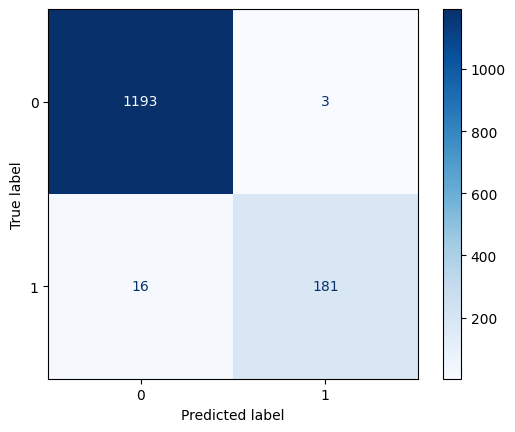

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_NB.classes_ )
cm_disp.plot(cmap="Blues")

#### Classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1196
           1       0.98      0.92      0.95       197

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



#### ROC Curve

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thres = roc_curve(y_test, y_pred)
ROC_Score = roc_auc_score(y_test, y_pred).round(5)
print(f"ROC Score: {ROC_Score}")

ROC Score: 0.95814


Text(0, 0.5, 'True Positive rate')

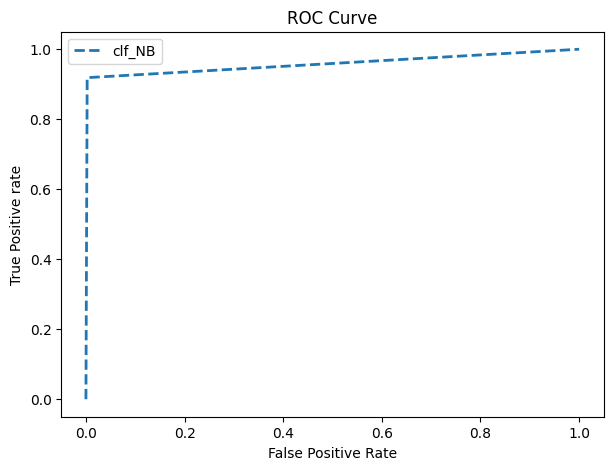

In [22]:
plt.figure(figsize=(7,5))

plt.plot(fpr, tpr, ls='--', lw=2,  label='clf_NB')

plt.legend(loc="best")
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')